In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats


In [ ]:
data = pd.read_csv('/content/sample_data/Extended_Employee_Performance_and_Productivity_Data.csv')
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

Dataset sadrži podatke za 100000 zaposlenika. Sadrži varijable tipa int, object i float.

In [ ]:
data_to_describe = data.drop(columns = ['Employee_ID', 'Gender', 'Department', 'Job_Title', 'Hire_Date', 'Education_Level', 'Resigned'] )
data_to_describe.describe()

Age  Years_At_Company  Performance_Score  Monthly_Salary  \
count  100000.000000     100000.000000      100000.000000   100000.000000   
mean       41.029410          4.476070           2.995430     6403.211000   
std        11.244121          2.869336           1.414726     1372.508717   
min        22.000000          0.000000           1.000000     3850.000000   
25%        31.000000          2.000000           2.000000     5250.000000   
50%        41.000000          4.000000           3.000000     6500.000000   
75%        51.000000          7.000000           4.000000     7500.000000   
max        60.000000         10.000000           5.000000     9000.000000   

       Work_Hours_Per_Week  Projects_Handled  Overtime_Hours      Sick_Days  \
count        100000.000000     100000.000000   100000.000000  100000.000000   
mean             44.956950         24.431170       14.514930       7.008550   
std               8.942003         14.469584        8.664026       4.331591   
min              30.000000          0.000000        0.000000       0.000000   
25%              37.000000         12.000000        7.000000       3.000000   
50%              45.000000         24.000000       15.000000       7.000000   
75%              53.000000         37.000000       22.000000      11.000000   
max              60.000000         49.000000       29.000000      14.000000   

       Remote_Work_Frequency      Team_Size  Training_Hours     Promotions  \
count          100000.000000  100000.000000   100000.000000  100000.000000   
mean               50.090500      10.013560       49.506060       0.999720   
std                35.351157       5.495405       28.890383       0.815872   
min                 0.000000       1.000000        0.000000       0.000000   
25%                25.000000       5.000000       25.000000       0.000000   
50%                50.000000      10.000000       49.000000       1.000000   
75%                75.000000      15.000000       75.000000       2.000000   
max               100.000000      19.000000       99.000000       2.000000   

       Employee_Satisfaction_Score  
count                100000.000000  
mean                      2.999088  
std                       1.150719  
min                       1.000000  
25%                       2.010000  
50%                       3.000000  
75%                       3.990000  
max                       5.000000

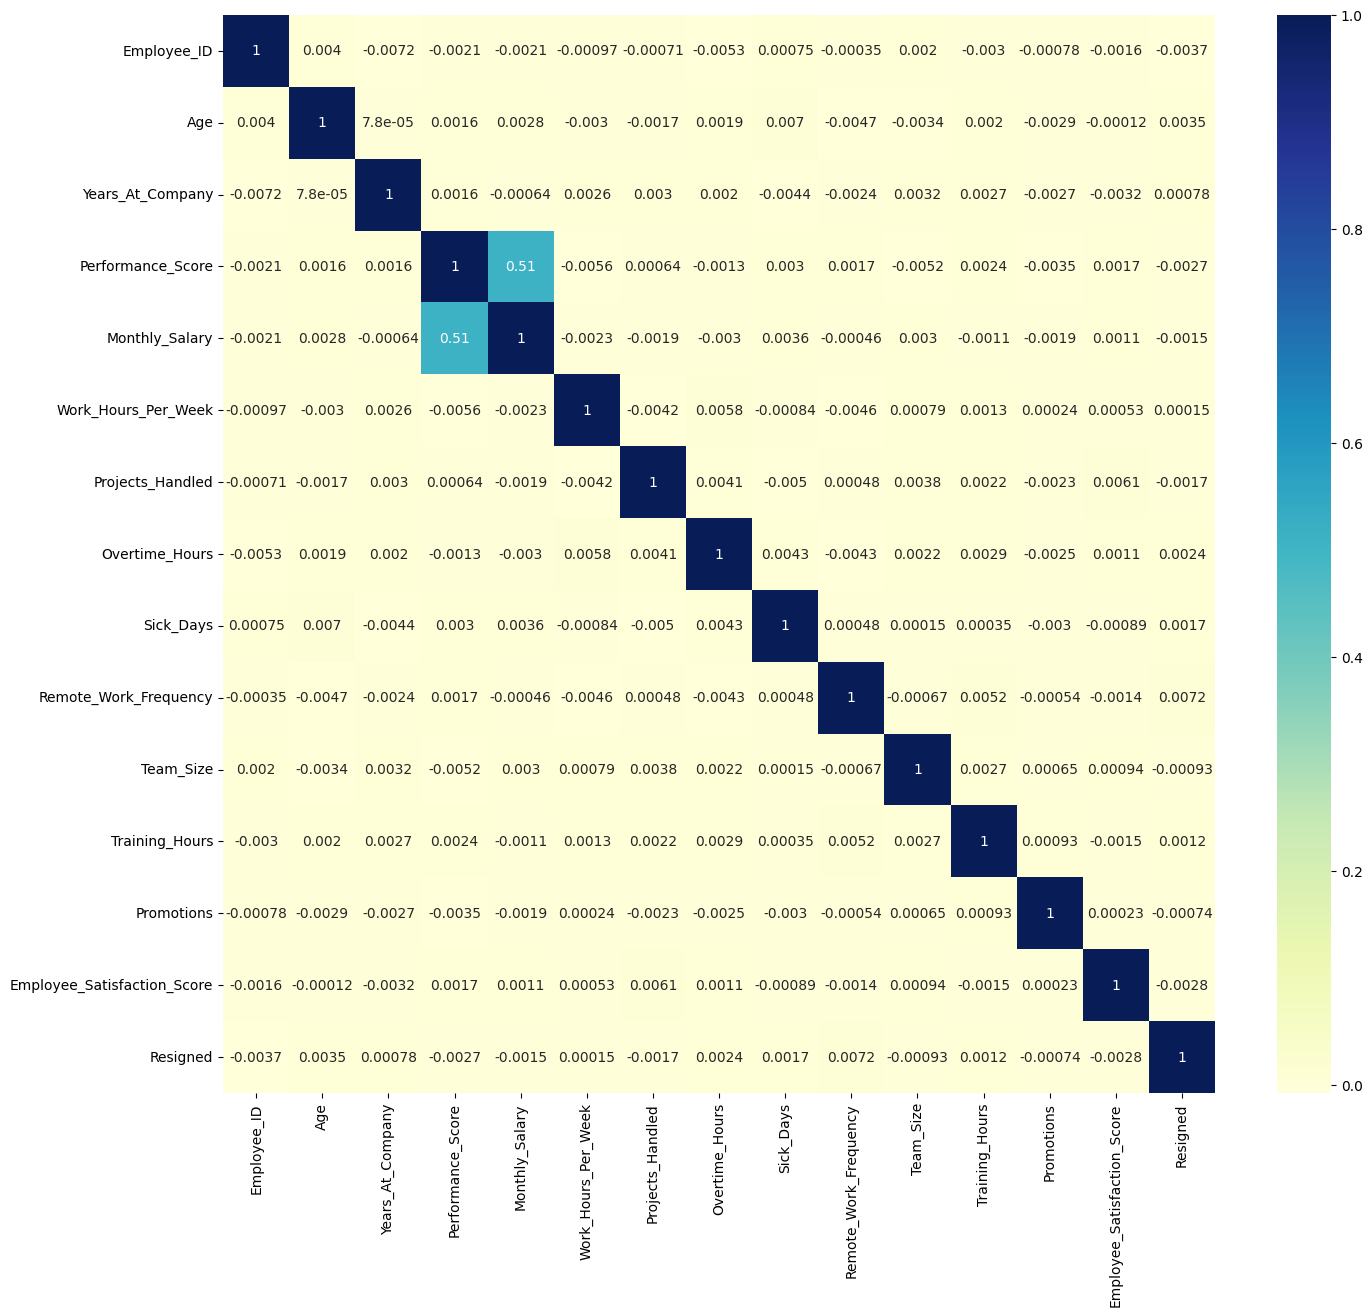

In [ ]:
data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(16, 14))
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

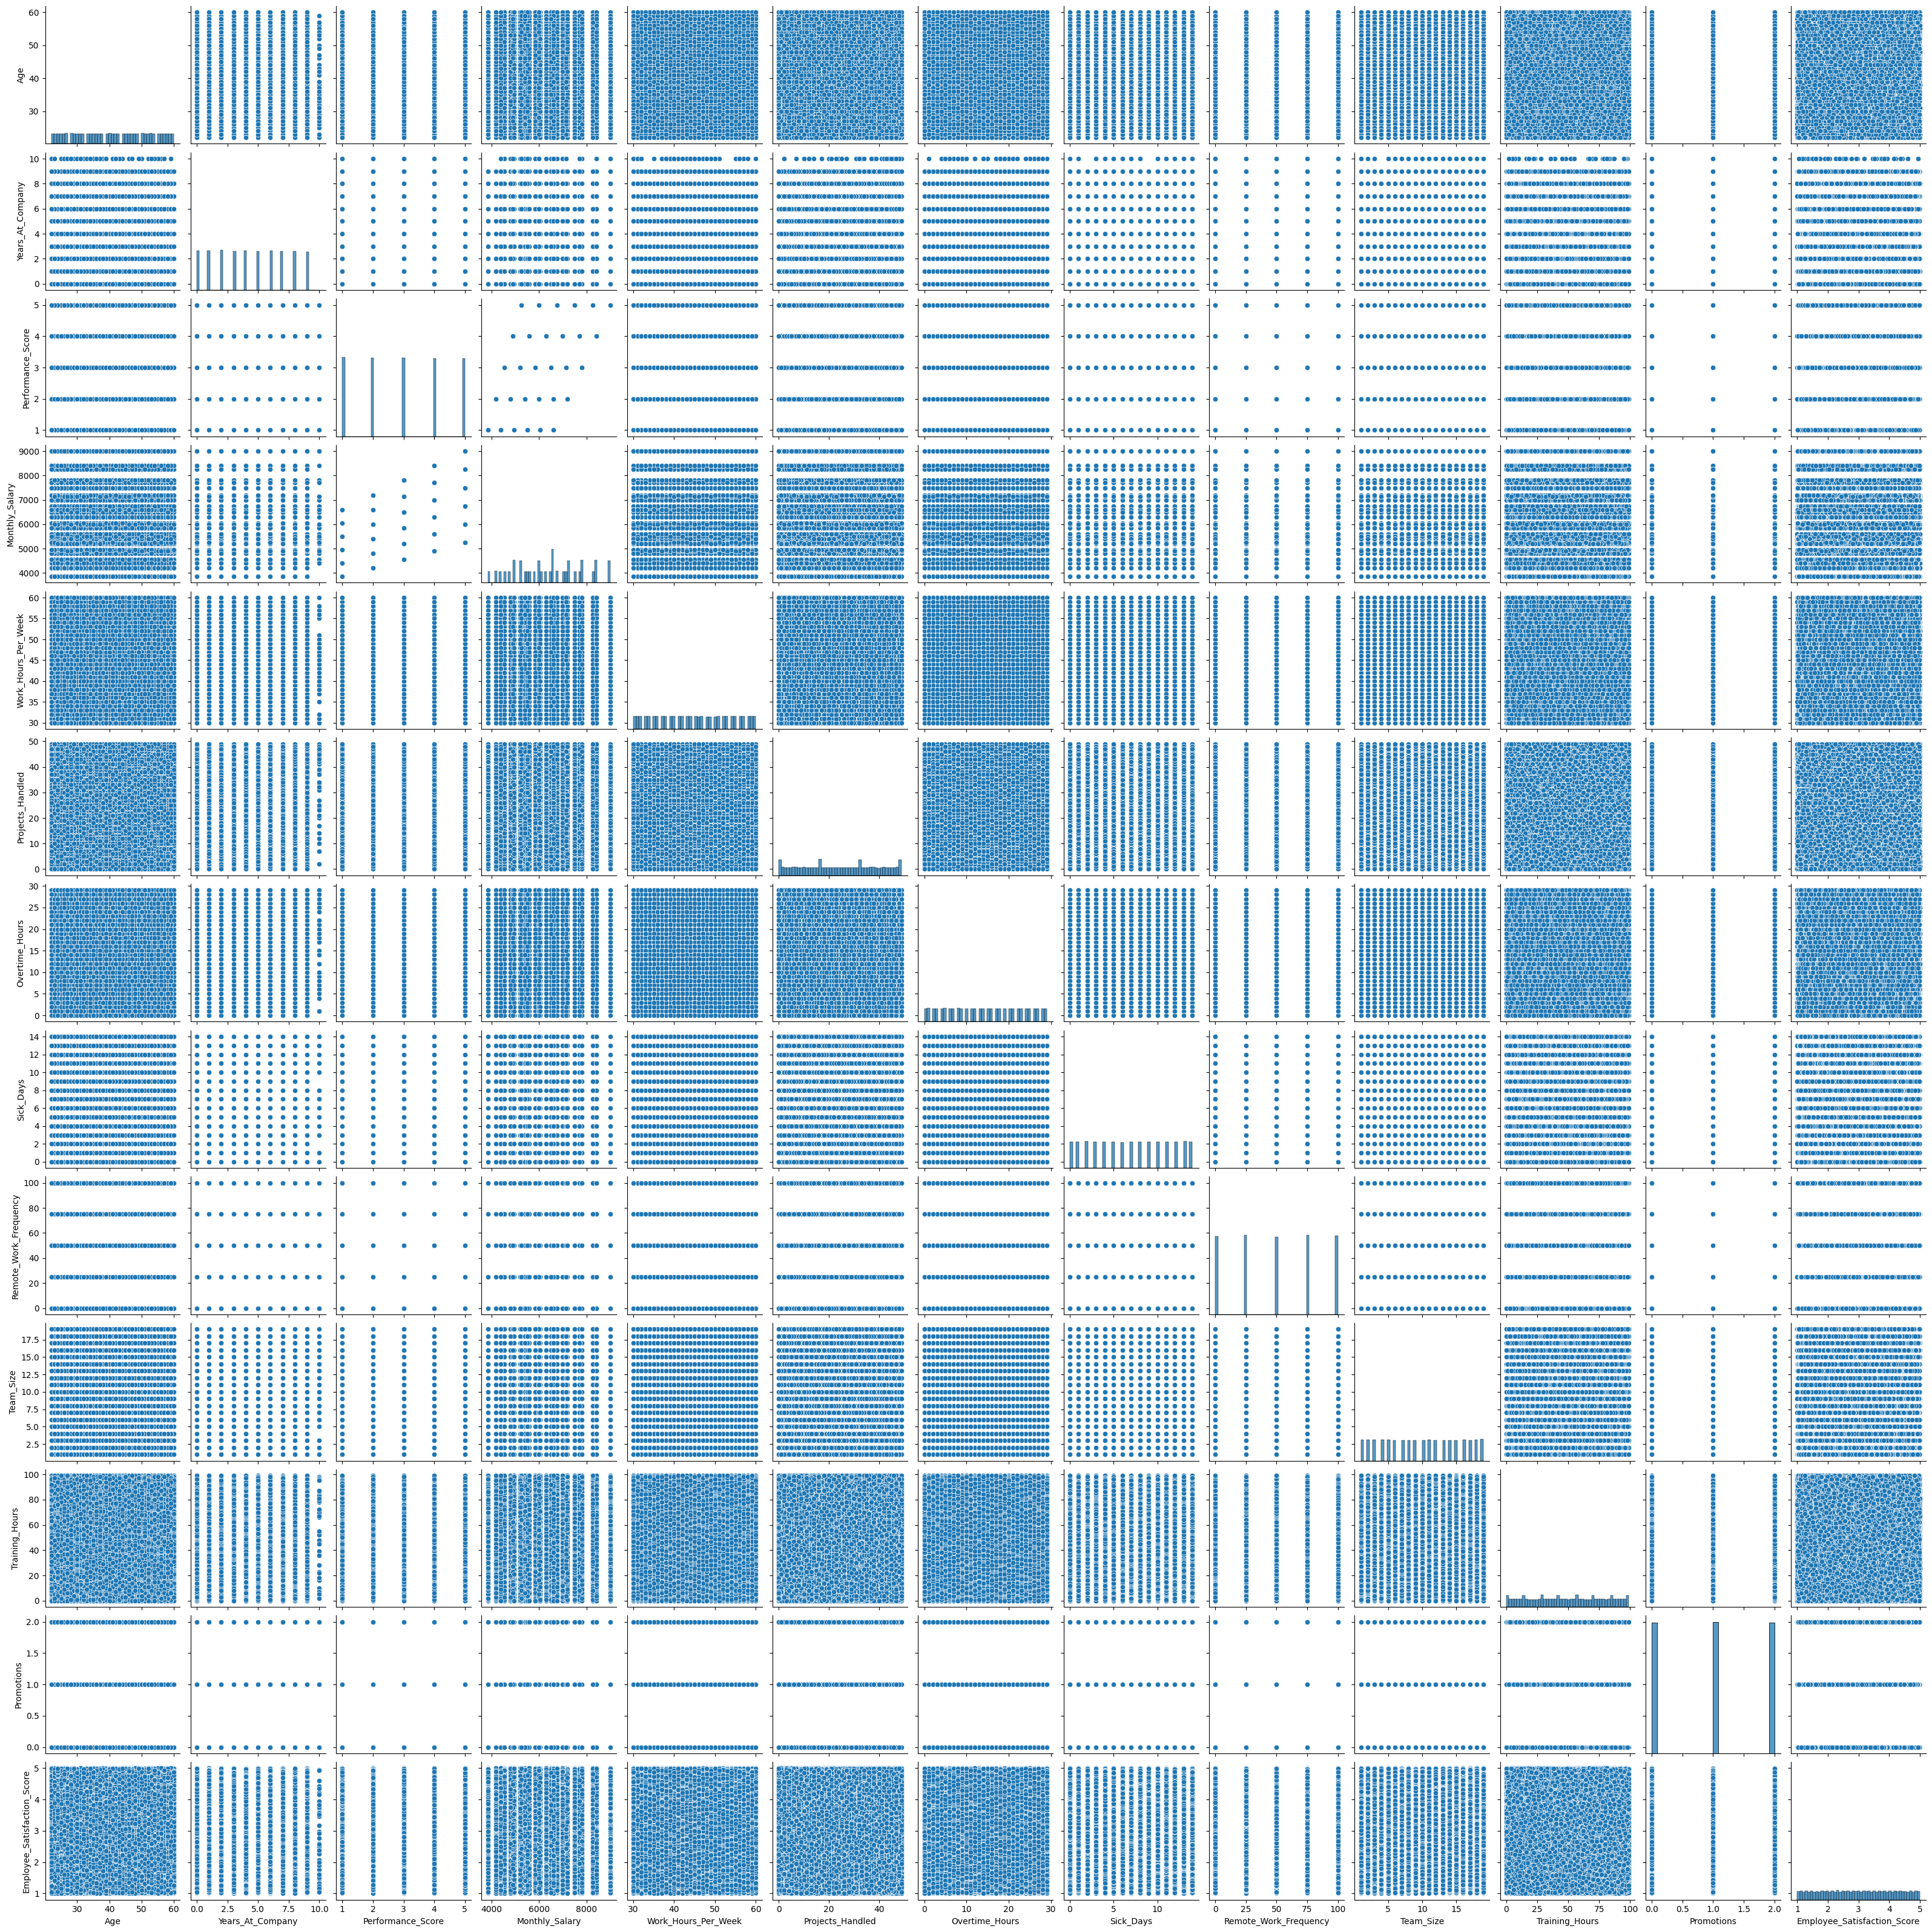

In [ ]:
sns.pairplot(data_to_describe)
plt.show()

Tablica prikazuje deskriptivnu statistiku za numeričke varijable dataseta. Srednje, minimalne, maksimalne vrijednosti, standardnu devijaciju.

In [ ]:
#Testiranje normalnosti podataka
SALARY = data['Monthly_Salary']
from scipy.stats import kstest

stat, p_value = kstest(SALARY, 'norm')
if p_value < 0.05:
  print (p_value)
  print ('Podaci nisu normalno raspoređeni')
else:
  print (p_value)
  print ('Podaci su normalno raspoređeni')

0.0
Podaci nisu normalno raspoređeni


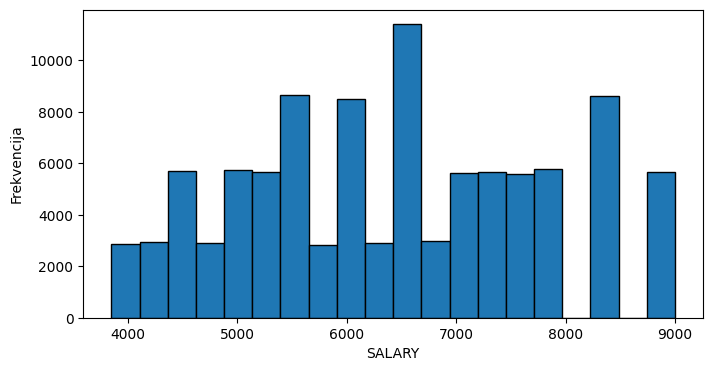

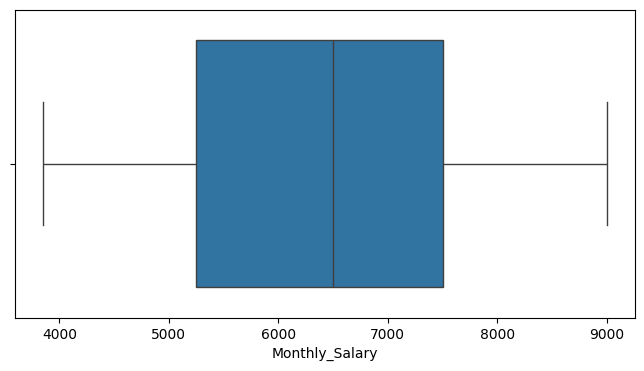

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(SALARY, bins=20, edgecolor='black')
plt.xlabel('SALARY')
plt.ylabel('Frekvencija')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=SALARY)
plt.xlabel('Monthly_Salary')
plt.show()

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean, lower, upper = mean_confidence_interval(SALARY)
print("Mean: ", mean)
print("Upper: ", upper)
print("Lower: ", lower)

Mean:  6403.211
Upper:  6411.717843808588
Lower:  6394.704156191412


Imterval povjerenja nam govori da možemo biti 95% sigurni da se odabrana vrijednost nalazi u intervalu <6394.7, 6411.72>, a srednja vrijednost je 6403.2.


Ne postoji značajna razlika između skupina (Mann-Whitney).


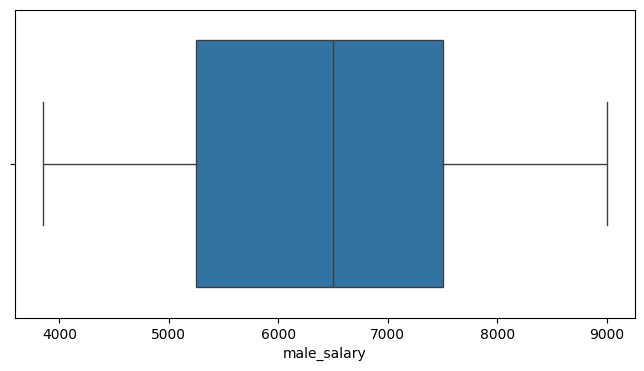

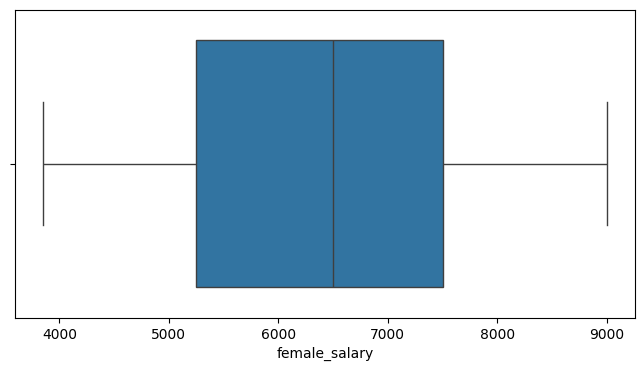

In [ ]:
male_salary = data[data['Gender'] == 'Male']['Monthly_Salary']
female_salary = data[data['Gender'] == 'Female']['Monthly_Salary']

stat, p_value = stats.mannwhitneyu(male_salary, female_salary)
if p_value < 0.05:
 print("Postoji značajna razlika između skupina (Mann-Whitney).")
else:
 print("Ne postoji značajna razlika između skupina (Mann-Whitney).")

plt.figure(figsize=(8, 4))
sns.boxplot(x=male_salary)
plt.xlabel('male_salary')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=female_salary)
plt.xlabel('female_salary')
plt.show()


Korisitmo Mann-Whitney U test kako bi provjerili postoji li značajna razlika između grupe muškaraca i žena u plaći. Koristimo ovaj test jer podaci nisu normalno raspoređeni. Dobivamo p_value veći od 0.05, te zaključujemo da nema značajne razlike između grupa.

In [ ]:
groups = data.groupby('Education_Level')

ELVL1 = groups.get_group('High School')['Monthly_Salary']
print(ELVL1.describe())

ELVL2 = groups.get_group('Bachelor')['Monthly_Salary']
print(ELVL2.describe())

ELVL3 = groups.get_group('Master')['Monthly_Salary']
print(ELVL3.describe())

ELVL4 = groups.get_group('PhD')['Monthly_Salary']
print(ELVL4.describe())

count    30004.000000
mean      6399.356752
std       1375.293039
min       3850.000000
25%       5250.000000
50%       6500.000000
75%       7500.000000
max       9000.000000
Name: Monthly_Salary, dtype: float64
count    50041.000000
mean      6398.421295
std       1371.285917
min       3850.000000
25%       5250.000000
50%       6500.000000
75%       7500.000000
max       9000.000000
Name: Monthly_Salary, dtype: float64
count    14904.000000
mean      6417.448336
std       1372.929197
min       3850.000000
25%       5250.000000
50%       6500.000000
75%       7500.000000
max       9000.000000
Name: Monthly_Salary, dtype: float64
count    5051.000000
mean     6431.548208
std      1366.589329
min      3850.000000
25%      5400.000000
50%      6500.000000
75%      7500.000000
max      9000.000000
Name: Monthly_Salary, dtype: float64


In [ ]:
print(stats.kstest(ELVL1, 'norm'))
print(stats.kstest(ELVL2, 'norm'))
print(stats.kstest(ELVL3, 'norm'))
print(stats.kstest(ELVL4, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3850.0, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3850.0, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3850.0, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3850.0, statistic_sign=-1)


In [ ]:
from scipy.stats import levene

levene(ELVL1, ELVL2, ELVL3, ELVL4, center='mean')

LeveneResult(statistic=0.6965416859953119, pvalue=0.5540168442427378)

Grupiramo podatke o mjesečnoj plaći po razinama obrazovanja. Grupe nisu normalno distribuirane(kstest) i nema značajnih razlika u varijanci(levene).

In [ ]:
from scipy.stats import f_oneway

f_oneway(ELVL1, ELVL2, ELVL3, ELVL4)

F_onewayResult(statistic=1.534302528003941, pvalue=0.2032999015660476)

Oneway anova nije pogodna u ovom slučaju jer podaci nisu normalno distribuirani. Koristimo Kruskal wallis test.

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
from pingouin import kruskal, read_dataset

kruskal(data=data, dv='Monthly_Salary', between='Education_Level')

Source  ddof1         H     p-unc
Kruskal  Education_Level      3  4.527469  0.209853

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ddof1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ddof1'}, axis=1)
              .sort_values('ddof1', ascending=True))
  xs = counted['ddof1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('ddof1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ddof1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['H']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'H'}, axis=1)
              .sort_values('H', ascending=True))
  xs = counted['H']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('H', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('H')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['p-unc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'p-unc'}, axis=1)
              .sort_values('p-unc', ascending=True))
  xs = counted['p-unc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('p-unc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p-unc')
_ = plt.ylabel('count()')

Kruskal wallis test nam govori da nema značajnih razlika u varijanci između grupa.

In [ ]:
!pip install scikit-posthocs
import scikit_posthocs as sp

In [ ]:
grupe = [ELVL1, ELVL2, ELVL3, ELVL4]

posthoc = sp.posthoc_dunn(grupe, p_adjust = 'bonferroni')
print(posthoc)

          1         2    3         4
1  1.000000  1.000000  1.0  0.641474
2  1.000000  1.000000  1.0  0.511003
3  1.000000  1.000000  1.0  1.000000
4  0.641474  0.511003  1.0  1.000000


Post hoc testom potvrđujemo rezultat Kruskal wallis testa. Iz tablice je vidljivo da su sve p vrijednosti veće on 0.05, te nema značajnih razlika.


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Monthly_Salary ~ C(Education_Level) + C(Job_Title) + C(Education_Level):C(Job_Title)', data = data).fit()
result = sm.stats.anova_lm(model, typ=2)
print(result)

                                       sum_sq       df             F    PR(>F)
C(Education_Level)               3.521649e+06      3.0      2.336103  0.071640
C(Job_Title)                     1.381251e+11      6.0  45812.988564  0.000000
C(Education_Level):C(Job_Title)  6.815335e+06     18.0      0.753498  0.757094
Residual                         5.023555e+10  99972.0           NaN       NaN


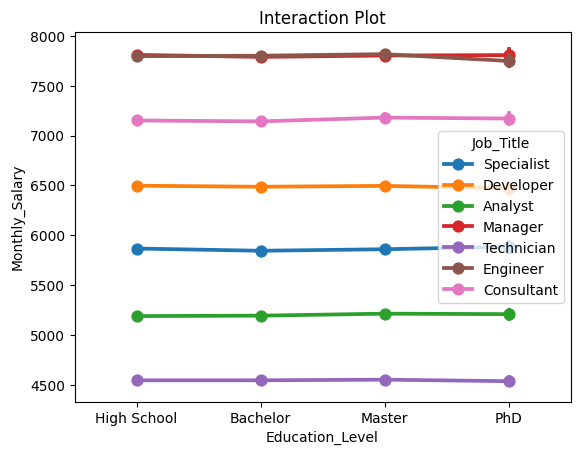

In [ ]:
sns.pointplot(x="Education_Level", y="Monthly_Salary", hue="Job_Title", data=data)
plt.title("Interaction Plot")
plt.show()




Two way anova nam govori da Department nema značajan utjecaj na plaću, ali Job_Title ima. to vidimo po P_vrijednosti. Isto tako vidimo da odnos tih dvaju varijabli nema značajan utjecaj na plaću ovisno o odabranoj razini pouzdanosti.

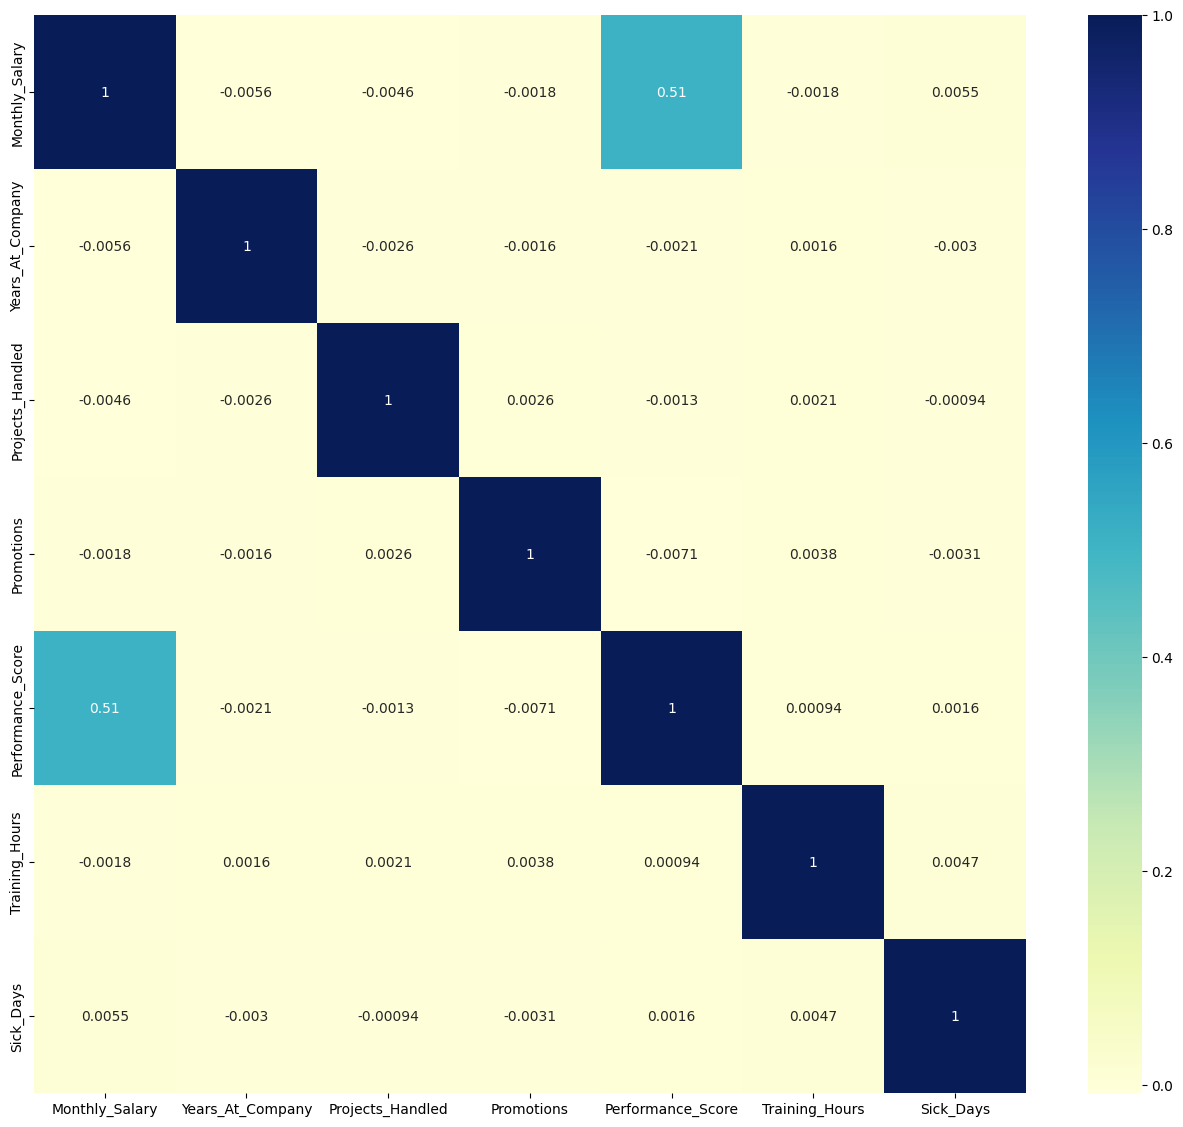

In [ ]:
correlation_matrix = data[
    [
        "Monthly_Salary",
        "Years_At_Company",
        "Projects_Handled",
        "Promotions",
        "Performance_Score",
        "Training_Hours",
        "Sick_Days",
    ]
].corr()

fig, ax = plt.subplots(figsize=(16, 14))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

Slope: -1.347655202809367e-06
Intercept: 4.484699320618836
R-value: -0.0006446329202725077
P-value: 0.8384720462524726
Standard error: 6.611051870283175e-06


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


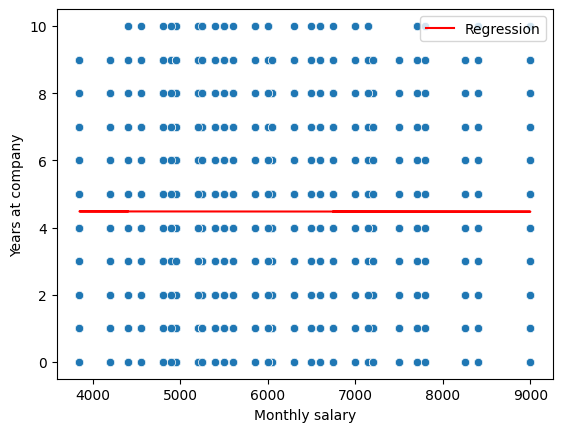

In [ ]:
ZAVISNA = data['Monthly_Salary']
NEZAVISNA = data['Years_At_Company']

slope, intercept, r_value, p_value, std_err = stats.linregress(ZAVISNA, NEZAVISNA)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(x=ZAVISNA, y=NEZAVISNA)
plt.plot(ZAVISNA, intercept + slope * ZAVISNA, color='red', label='Regression')
plt.xlabel('Monthly salary')
plt.ylabel('Years at company')
plt.legend()
plt.show()

R-value je 0.5 što ukazuje na blagu kolinearnost plaće i performance score.